<a href="https://colab.research.google.com/github/ZEY0D/AutoPriceAI/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the necessary libraries

In [44]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

Dataset Preparation

load the dataset csv file into colab

In [5]:
from google.colab import files

# This will open a file picker — select your 'train.csv' manually from your PC.
uploaded = files.upload()


Saving train.csv to train.csv


read the data using pandas

In [6]:
data = pd.read_csv("train.csv")

In [ ]:
print(data.head())  # debugging step

   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


convert the data into tensor data

In [7]:
tensor_data = tf.constant(data)
print(tensor_data.numpy())

[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]]


shuffle the dataset avoiding any bias

In [8]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[9.100000e+02 6.807810e+05 8.261280e+05 ... 9.300000e+01 8.600000e+01
  4.673950e+05]
 [3.730000e+02 5.657190e+05 7.670520e+05 ... 1.050000e+02 6.900000e+01
  4.063495e+05]
 [1.800000e+02 6.479560e+05 8.595350e+05 ... 1.020000e+02 1.300000e+02
  4.598335e+05]
 ...
 [4.200000e+01 6.231580e+05 8.788590e+05 ... 8.300000e+01 8.100000e+01
  4.501985e+05]
 [4.880000e+02 5.435870e+05 8.112450e+05 ... 1.000000e+02 1.120000e+02
  3.883760e+05]
 [9.290000e+02 5.957920e+05 7.806470e+05 ... 7.000000e+01 1.100000e+02
  3.668785e+05]], shape=(1000, 12), dtype=float64)


preparing x and y

In [9]:
x = tensor_data[:, 3:-1]  # gettint all rows with columns restrictions
print(x.shape)  #(1000,8)

(1000, 8)


In [10]:
y = tensor_data[:, -1]
print(y.shape)  # y here is a 1D data so we need to exapnd it to be (1000,1)

y = tf.expand_dims(y, axis = -1)
print(y.shape)  # (1000,1) instead of (1000,)

(1000,)
(1000, 1)


Dataset Normalization using keras

In [31]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(x)  #getting the mean and var
normalizer(x[:5])


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4194925 , -0.80362856, -0.7046623 ,  1.2072107 ,  0.6167485 ,
        -1.4468278 ,  0.41225603, -0.82776725],
       [-0.9084984 , -1.2006304 ,  0.72177976, -0.56393176, -0.72888464,
         1.3541863 ,  0.9974312 , -1.6354378 ],
       [ 0.8374948 , -0.52184546, -1.4178834 ,  1.5614392 , -0.28034025,
        -0.4612858 ,  0.8511374 ,  1.2626745 ],
       [-0.9084984 ,  1.234408  ,  1.4350008 ,  0.14452522,  0.16820414,
        -0.56502706, -0.9043881 ,  0.692554  ],
       [ 1.4194925 ,  0.22554903,  0.72177976,  0.14452522, -0.28034025,
        -1.135604  , -0.46550673,  1.1676544 ]], dtype=float32)>

In [32]:
print(x.shape)

(1000, 8)


Linear Regression Model

In [39]:
model = tf.keras.Sequential([
    InputLayer(shape = (8,)),
    normalizer,
    Dense(1)
])


run once to let the model know about the data

In [28]:
# model(x)

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[-1.72507477e+00],
       [-1.41735882e-01],
       [-2.27297926e+00],
       [ 2.21287489e+00],
       [-5.19942641e-01],
       [-8.92791986e-01],
       [-7.35211492e-01],
       [ 2.14587241e-01],
       [ 7.02108443e-02],
       [-2.32943439e+00],
       [-9.47779596e-01],
       [ 1.40357924e+00],
       [ 4.06683564e-01],
       [ 1.07061815e+00],
       [ 7.62116790e-01],
       [-9.39097524e-01],
       [ 7.26595461e-01],
       [-1.94198072e+00],
       [ 4.40675020e-01],
       [-3.62874687e-01],
       [ 4.46321607e-01],
       [ 6.39089942e-01],
       [-1.88409233e+00],
       [ 9.85691786e-01],
       [ 1.31327415e+00],
       [-1.10233235e+00],
       [-7.00452507e-01],
       [ 4.01252270e-01],
       [-1.41542804e+00],
       [-1.45683303e-01],
       [ 5.36797345e-01],
       [-5.56516409e-01],
       [ 9.37349200e-01],
       [-1.41195595e+00],
       [-3.06842208e-01],
       [ 4.87538010e-01],
       [ 9.01

In [40]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

Plotting the model flow using keras

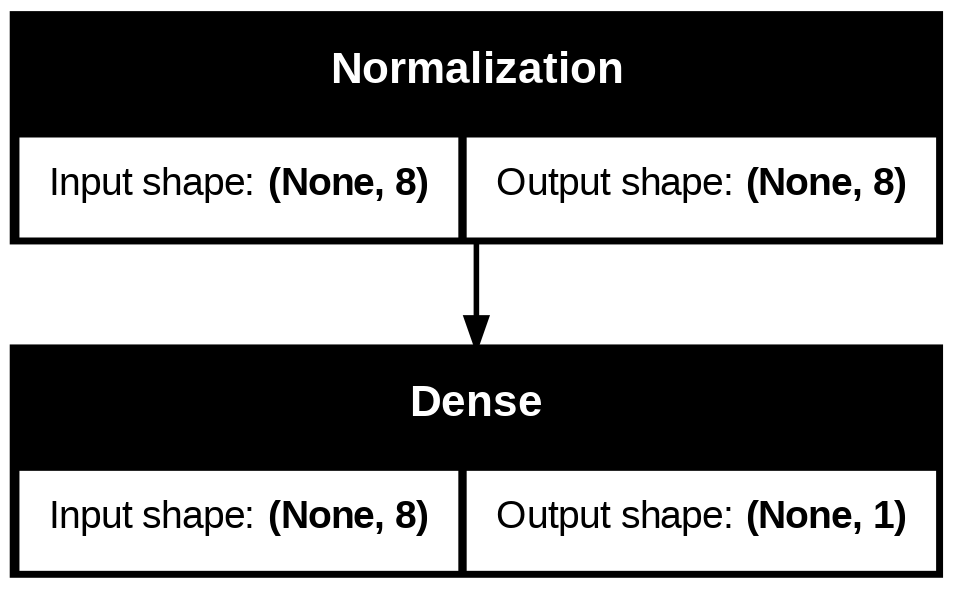

In [41]:
tf.keras.utils.plot_model(model, to_file= "model.png", show_shapes = True)

Error Calculation using MSE,MAE,HUB

In [45]:
model.compile(loss = MeanAbsoluteError)